In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from pathlib import Path

figures_folder = Path('../figures')
figures_folder.mkdir(exist_ok=True)

In [6]:
def _well_name(n: int) -> str:
    if n == 0:
        return 'P3'
    if n == 9:
        return 'WELL9G'
    return f'WELL{n}'


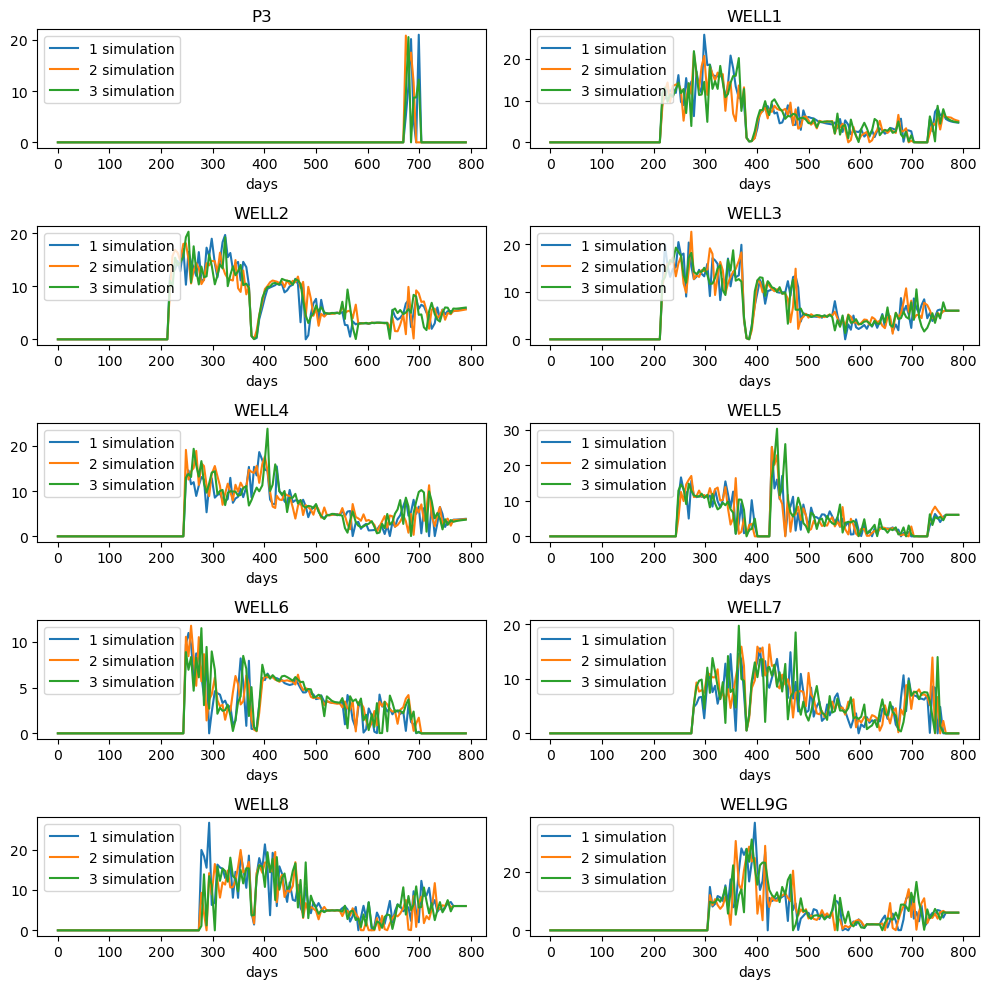

In [16]:
plt.subplots(5, 2, figsize=(10, 10))
n_iterations = 3
# folders = ['../tmp/'] + [f'../data/iteration_{i}' for i in range(n_iterations)]
# labels = [f'{i} iteration' for i in range(n_iterations)]
folders = [f'../data/iteration_{i}' for i in range(n_iterations)]
labels = [f'{i + 1} simulation' for i in range(n_iterations)]
for folder, label in zip(folders, labels):
    for n in range(10):
        plt.subplot(5, 2, n + 1)
        if n == 9:
            n = '9G'
        name = f'OW2P-RT.WELL.{_well_name(n)}.CSV'
        results = pd.read_csv(f'{folder}/{name}')
        results.columns = [col.strip() for col in results.columns]
        oil_production = 'WOPR (M3/DAY)'
        time = 'TIME (DAYS)'
        plt.plot(results[time], results[oil_production], label=label)
        plt.title(_well_name(n))
        plt.xlabel('days')
        plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig(figures_folder / 'simulations.png')
plt.show()